<a href="https://colab.research.google.com/github/bernaldiaz/bernaldiaz/blob/main/kalman3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

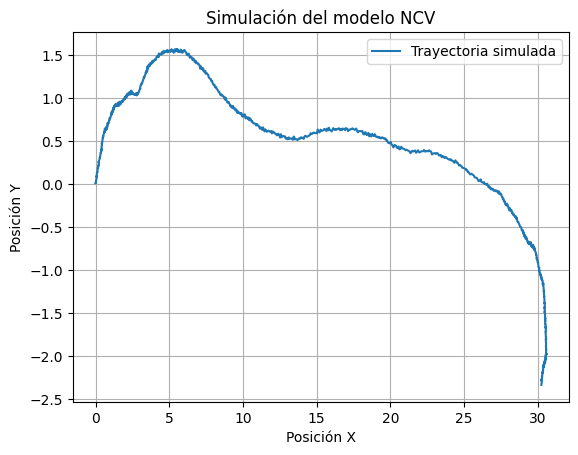

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import dlti, dlsim

# Parámetros de simulación
maxT = 1000  # Número de pasos de simulación
dT = 0.1  # Período de muestreo

# Definición de matrices del sistema
A = np.array([[1, dT, 0, 0],
              [0, 1, 0, 0],
              [0, 0, 1, dT],
              [0, 0, 0, 1]])

Bw = np.array([[dT**2/2, 0],
               [dT, 0],
               [0, dT**2/2],
               [0, dT]])

C = np.array([[1, 0, 0, 0],
              [0, 0, 1, 0]])
D = np.zeros((2, 2))

# Generación de ruido
t = np.arange(maxT) * dT
w = 0.1 * np.random.randn(maxT,2)  # Entrada aleatoria
v = 0.01 * np.random.randn(maxT,2)  # Ruido de medición

# Estado inicial
x0 = np.array([0, 0.1, 0, 0.1])

# Definir el sistema
discrete_system = dlti(A, Bw, C, D, dt=dT)

# Simulación del sistema
time, response, _ = dlsim(discrete_system, w, t=t, x0=x0)
z = response + v  # Añadir ruido de medición

# Graficar resultados
plt.plot(z[:, 0], z[:, 1], label="Trayectoria simulada")
plt.xlabel("Posición X")
plt.ylabel("Posición Y")
plt.title("Simulación del modelo NCV")
plt.legend()
plt.grid()
plt.show()
